1.  **Load and Inspect Data:**


Tasks :

    -Utilize pandas to load the World Happiness Report Dataset.

    -Examine the data to grasp its structure and contents of the year 2019.

In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d unsdsn/world-happiness


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip world-happiness.zip y

Archive:  world-happiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
import pandas as pd
Data = pd.read_csv("2019.csv")
Data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


2. *Data Preprocessing*

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
Data.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


3. **Social Support and Happiness:**

Task : Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

In [6]:
Data["Country or region"].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [7]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns to encode
categorical_col = ["Country or region"]

# Apply one-hot encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)  # drop="first" to avoid multicollinearity
encoded_feature = encoder.fit_transform(Data[categorical_col])

# Convert to DataFrame
encoded_data = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(categorical_col))

# Merge with original DataFrame (removing original categorical columns)
data_encoded = pd.concat([Data.drop(columns=categorical_col), encoded_data], axis=1)

# Display new DataFrame
data_encoded.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country or region_Albania,Country or region_Algeria,...,Country or region_United Arab Emirates,Country or region_United Kingdom,Country or region_United States,Country or region_Uruguay,Country or region_Uzbekistan,Country or region_Venezuela,Country or region_Vietnam,Country or region_Yemen,Country or region_Zambia,Country or region_Zimbabwe
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df = data_encoded

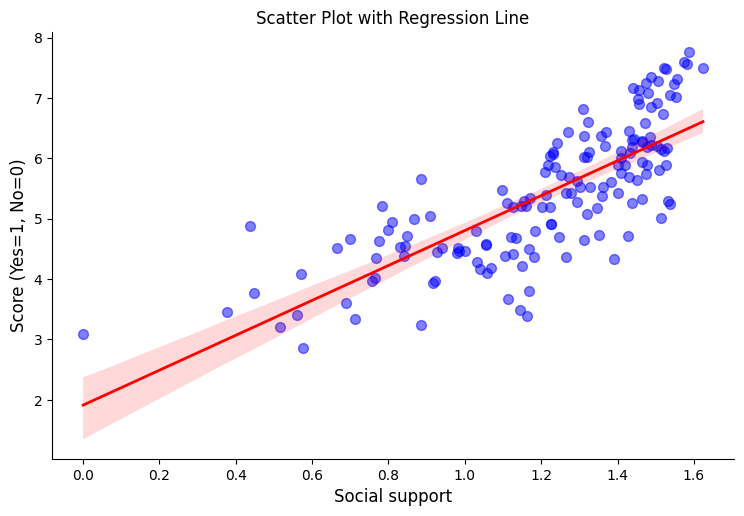

In [9]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt  # Standard plotting library
import seaborn as sns  # Advanced visualization library

# Create a scatter plot with a regression line using Seaborn's lmplot
sns.lmplot(
    x='Social support',  y='Score',  data=df, aspect=1.5, height=5,
    scatter_kws={'alpha': 0.5, 's': 50, 'color': 'blue'},
    line_kws={'color': 'red', 'lw': 2}  # Customization for the regression line:
 )

# Add titles to plot and axis
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Social support', fontsize=12)
plt.ylabel('Score (Yes=1, No=0)', fontsize=12)

# Display the plot
plt.show()


4. **Regional Comparisons of GDP and Health:**

Tasks:

    - Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.

    - Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.

Let's look at the number of regions

```
# Ce texte est au format code
```



In [10]:
n_regions =Data["Country or region"].nunique()
print(f"The dataFrame contains {n_regions} in our DataFrame")

The dataFrame contains 156 in our DataFrame


We need to aggregate the data by region before plotting the subplots to ensure a regional analysis rather than a country-level analysis. This will provide a more meaningful comparison, as we can calculate the average values for 'GDP per Capita' and 'Healthy Life Expectancy' within each region.

In [14]:
df_grouped = Data.groupby("Country or region")[["GDP per capita", "Healthy life expectancy"]].mean().reset_index()
df_grouped.head()


,Country or region,GDP per capita,Healthy life expectancy
0,Afghanistan,0.350,0.361
1,Albania,0.947,0.874
2,Algeria,1.002,0.785
3,Argentina,1.092,0.881
4,Armenia,0.850,0.815


<ipython-input-24-2ec4f98efc99>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_grouped["Country or region"], rotation=45, ha="right") #rotates the labels by 45° for greater readability


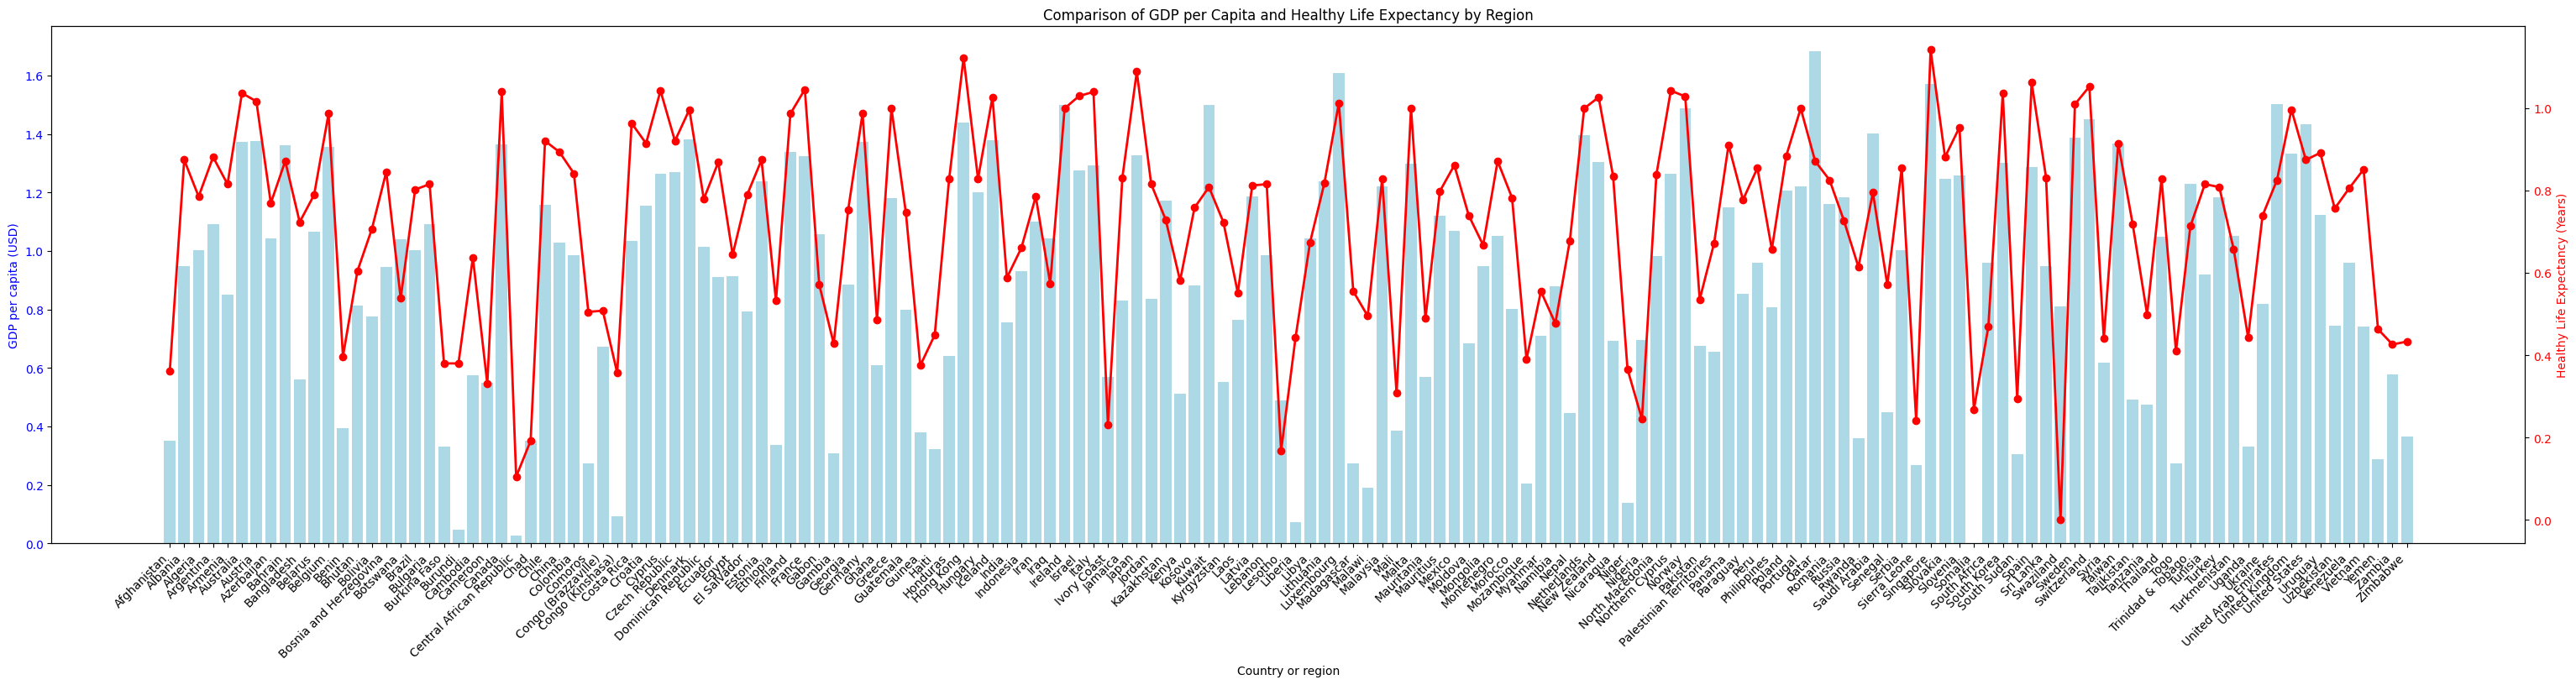

In [24]:
fig, ax1 = plt.subplots(figsize=(38,8))

# Bar plot pour GDP per Capita
ax1.bar(df_grouped["Country or region"], df_grouped["GDP per capita"], color="lightblue", label="GDP per Capita")
ax1.set_xlabel("Country or region")
ax1.set_ylabel("GDP per capita (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(df_grouped["Country or region"], rotation=45, ha="right") #Rotates the labels by 45° for greater readability

ax2 = ax1.twinx() #  twinx() method allows two plots with different y scales to be superimposed on the same set of x-axis values.
ax2.plot(df_grouped["Country or region"], df_grouped["Healthy life expectancy"], color="red", marker="o", linestyle="-", linewidth=2, label="Healthy Life Expectancy")
ax2.set_ylabel("Healthy Life Expectancy (Years)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Comparison of GDP per Capita and Healthy Life Expectancy by Region")
plt.show()
